## Random Forest Classifier for Particles Showers Classification##

Random forest classifiers are a powerful machine learning techniques. It has been previously used in calorimeter data classification and regression. In this notebook, we provide an example of how it can be used in our task, and what results is is able to achieve. 

# Data loading and preprocessing

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
import time, math, copy
from tqdm import tqdm
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import h5py
import numpy as np

In [ ]:
f = h5py.File("/content/gdrive/MyDrive/gamma.hdf5", 'r') 

In [ ]:
with h5py.File("/content/gdrive/MyDrive/gamma.hdf5", 'r') as f:
   energy = f['energy'][:]
   layer_0 = f['layer_0'][:]
   layer_1 = f['layer_1'][:]
   layer_2 = f['layer_2'][:]
   overflow = f['overflow'][:]

In [ ]:
f = h5py.File("/content/gdrive/MyDrive/eplus.hdf5", 'r') 

In [ ]:
with h5py.File("/content/gdrive/MyDrive/eplus.hdf5", 'r') as f:
   energy_ep = f['energy'][:]
   layer_0_ep = f['layer_0'][:]
   layer_1_ep = f['layer_1'][:]
   layer_2_ep = f['layer_2'][:]
   overflow_ep = f['overflow'][:]

We are transformind the data into tabular data, because random forests cannot handle image (2 dimensional) data

In [ ]:
layer_0_flat = layer_0.reshape([100000,96*3])
layer_1_flat = layer_1.reshape([100000,12*12])
layer_2_flat = layer_2.reshape([100000,12*6])

layer_0_ep_flat = layer_0_ep.reshape([100000,96*3])
layer_1_ep_flat = layer_1_ep.reshape([100000,12*12])
layer_2_ep_flat = layer_2_ep.reshape([100000,12*6])

gam_data = np.hstack((layer_0_flat,layer_1_flat,layer_2_flat))
ep_data = np.hstack((layer_0_ep_flat,layer_1_ep_flat,layer_2_ep_flat))
labels = np.hstack((np.ones(100000), np.zeros(100000)))

In [ ]:
tota = np.vstack((gam_data,ep_data))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    tota, labels, test_size=0.33, random_state=42)

In [ ]:
indeces = np.arange(134000)
indeces_c = np.random.choice(indeces, 50000)

In [ ]:
len(X_train)

134000

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

print(clf.score(X_test,y_test))

0.6604242424242425


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.62      0.82      0.71     33187
         1.0       0.73      0.50      0.59     32813

    accuracy                           0.66     66000
   macro avg       0.68      0.66      0.65     66000
weighted avg       0.68      0.66      0.65     66000



Classification report suggests overfitting to the 0-th class (e-plus showers), as the recall for it is 0.82, while for the other class is 0.5

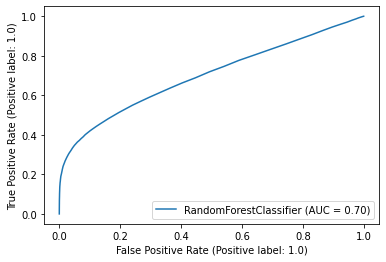

In [ ]:
from sklearn.metrics import RocCurveDisplay
efc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)